# android security dataset Machine learning anlysis

# 引入需要的库

In [134]:
import os
import shutil
import pandas as pd
import sklearn
import pickle
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 
from androguard.core.bytecodes.apk import APK
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Embedding, LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 

import numpy as np
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from keras.utils.vis_utils import plot_model

dataset_df = pd.read_csv('CICInvesAndMal2019/preprocessed_android_dataset.csv', index_col=False)  

# partI: 传统机器学习模型

In [135]:

Y = dataset_df['class']
X = dataset_df.drop(['class'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [136]:
print('定义参数范围') 

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf']} 

SVC_Model = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

 
SVC_Model.fit(X_train, y_train) 

定义参数范围
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.796 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.731 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.611 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.806 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.639 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.870 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.787 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.713 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.815 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.861 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.731 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, ker

[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.824 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.796 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.843 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.843 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.870 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.861 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.870 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.870 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.880 total time=   0.0s
[CV 5/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [137]:
print(SVC_Model.best_params_) 
grid_predictions = SVC_Model.predict(X_test) 

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [138]:
print(classification_report(y_test, grid_predictions)) 
pickle.dump(SVC_Model, open('model/first_model.pkl', 'wb'))

              precision    recall  f1-score   support

      benign       0.81      0.89      0.85        65
      malign       0.89      0.80      0.84        71

    accuracy                           0.85       136
   macro avg       0.85      0.85      0.85       136
weighted avg       0.85      0.85      0.85       136



In [139]:
default = open('CICInvesAndMal2019/DefaultPermList.txt','r').readlines()
perms = [s.rstrip('\n') for s in default]

Predict

In [140]:

def mytest(apk):
  vector = {}
  a = APK(apk)
  perm = a.get_permissions()
  print(perm)
  for d in perms:
    if d in perm:
      vector[d]=1
    else:
      vector[d]=0
  input = [ v for v in vector.values() ]
  print(input)
  print(grid.predict([input]))


mytest('CICInvesAndMal2019/Ransomware/PornDroid/00c0a3916b33e792e4b5f23a3a58ec7d.apk')
mytest('CICInvesAndMal2019/Ransomware/PornDroid/1ad669a7c148352dbb5389a8238e8fa0.apk')

['android.permission.GET_ACCOUNTS', 'android.permission.CAMERA', 'android.permission.GET_TASKS', 'android.permission.RECEIVE_BOOT_COMPLETED', 'android.permission.VIBRATE', 'android.permission.INTERNET', 'android.permission.ACCESS_NETWORK_STATE', 'android.permission.WRITE_SETTINGS', 'android.permission.WRITE_EXTERNAL_STORAGE', 'android.permission.READ_EXTERNAL_STORAGE', 'android.permission.READ_PHONE_STATE', 'android.permission.SYSTEM_ALERT_WINDOW', 'android.permission.READ_CONTACTS', 'android.permission.WAKE_LOCK']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

/Users/abel/miniforge3/envs/tf26/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/abel/miniforge3/envs/tf26/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# partII: ANN全联接深度学习模型

# Multilayer Perceptron ( Artificial Neural Network)

In [141]:
Y = dataset_df['class']
X = dataset_df.drop(['class'], axis=1)
encoder = LabelEncoder().fit(Y)
Y = encoder.transform(Y)
#print(encoder.transform(['malign']))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [142]:
ANN_Model = Sequential()
ANN_Model.add(Dense(256, activation='relu', input_dim=409))
ANN_Model.add(Dropout(0.2))
ANN_Model.add(Dense(128, activation='relu'))
ANN_Model.add(Dropout(0.2))
ANN_Model.add(Dense(128, activation='relu'))
ANN_Model.add(Dropout(0.2))
ANN_Model.add(Dense(32, activation='relu'))
ANN_Model.add(Dropout(0.2))
ANN_Model.add(Dense(1, activation='sigmoid'))
ANN_Model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = ANN_Model.fit(X_train, y_train, epochs=100, batch_size=32)



scores = ANN_Model.evaluate(X_test, y_test)
for i in range(len(scores)):
  print("\n%s: %.2f%%" % (ANN_Model.metrics_names[i], scores[i]*100))


Epoch 1/100


2022-08-08 16:30:28.311814: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 0s 10ms/step - loss: 0.6993 - accuracy: 0.4815
Epoch 2/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6885 - accuracy: 0.5167
Epoch 3/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6868 - accuracy: 0.5185
Epoch 4/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6846 - accuracy: 0.5019
Epoch 5/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6739 - accuracy: 0.5667
Epoch 6/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6704 - accuracy: 0.5667
Epoch 7/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6676 - accuracy: 0.5741
Epoch 8/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6564 - accuracy: 0.5759
Epoch 9/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6565 - accuracy: 0.6037
Epoch 10/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6491 - accuracy: 0.5833
Epoch 11/100
17/17 [

17/17 [==============================] - 0s 7ms/step - loss: 0.2443 - accuracy: 0.9148
Epoch 84/100
17/17 [==============================] - 0s 7ms/step - loss: 0.2421 - accuracy: 0.9204
Epoch 85/100
17/17 [==============================] - 0s 6ms/step - loss: 0.2389 - accuracy: 0.9167
Epoch 86/100
17/17 [==============================] - 0s 6ms/step - loss: 0.2497 - accuracy: 0.9167
Epoch 87/100
17/17 [==============================] - 0s 7ms/step - loss: 0.2373 - accuracy: 0.9130
Epoch 88/100
17/17 [==============================] - 0s 7ms/step - loss: 0.2304 - accuracy: 0.9111
Epoch 89/100
17/17 [==============================] - 0s 7ms/step - loss: 0.2295 - accuracy: 0.9241
Epoch 90/100
17/17 [==============================] - 0s 7ms/step - loss: 0.2262 - accuracy: 0.9148
Epoch 91/100
17/17 [==============================] - 0s 7ms/step - loss: 0.2236 - accuracy: 0.9204
Epoch 92/100
17/17 [==============================] - 0s 6ms/step - loss: 0.2258 - accuracy: 0.9130
Epoch 93/100


2022-08-08 16:30:40.471156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [143]:
print('模型结构')
print('-'*30)

print(ANN_Model.summary())



模型结构
------------------------------
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 256)               104960    
                                                                 
 dropout_60 (Dropout)        (None, 256)               0         
                                                                 
 dense_76 (Dense)            (None, 128)               32896     
                                                                 
 dropout_61 (Dropout)        (None, 128)               0         
                                                                 
 dense_77 (Dense)            (None, 128)               16512     
                                                                 
 dropout_62 (Dropout)        (None, 128)               0         
                                                                 
 dense_78 (Dense)

训练过程图



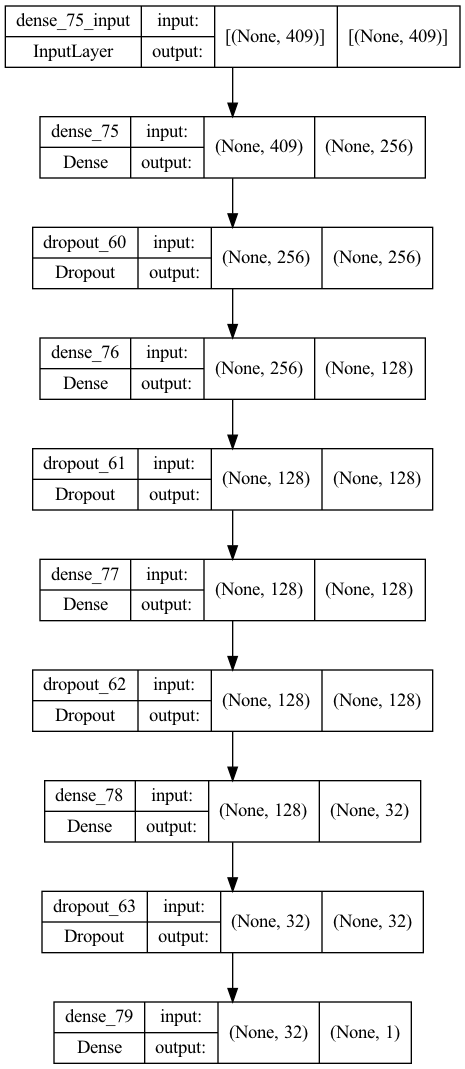

In [144]:
print('训练过程图\n')
plot_model(ANN_Model, to_file='i2model_plot.png', show_shapes=True, show_layer_names=True)

In [145]:
pickle.dump(ANN_Model, open('model/second_model.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://0ec87fd5-9af4-4e98-9d92-7176e3ef1cd3/assets


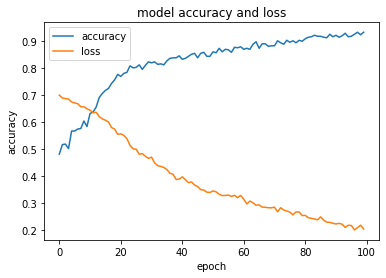

In [146]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()